<a href="https://colab.research.google.com/github/fitocuan/CE888_2020/blob/master/Lab7_Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "rodolfo123" # username from the json file
os.environ['KAGGLE_KEY'] = "cf9e3a73727f55098bcb611ec972f756" # key from the json file
!kaggle datasets download -d alessiocorrado99/animals10 # api copied from kaggle

 96% 564M/586M [00:07<00:00, 72.1MB/s]
100% 586M/586M [00:07<00:00, 84.0MB/s]


In [2]:
from zipfile import ZipFile

file_name = "/content/animals10.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
base_dir = '/content/animals10_small'
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)



In [0]:
dir_list = [train_dir,validation_dir,test_dir]


for i in dir_list:
  for item in os.listdir('/content/raw-img'):  
    os.mkdir(os.path.join(i, item))



In [6]:
import shutil


for cl in os.listdir('/content/raw-img'):
  print(cl)
  print(len(os.listdir('/content/raw-img/'+cl)))
  size = len(os.listdir('/content/raw-img/'+cl))

  for i in range(int(size*0.7)):
    fname = os.listdir('/content/raw-img/'+cl)[i]
    src = os.path.join('/content/raw-img/'+cl, fname)
    dst = os.path.join('/content/animals10_small/train/'+cl, fname)
    shutil.copyfile(src, dst)

  for j in range(int(size*0.7),int(size*0.7)+int(size*0.15)):
    fname = os.listdir('/content/raw-img/'+cl)[j]
    src = os.path.join('/content/raw-img/'+cl, fname)
    dst = os.path.join('/content/animals10_small/test/'+cl, fname)
    shutil.copyfile(src, dst)

  for k in range(int(size*0.7)+int(size*0.15),size):
    fname = os.listdir('/content/raw-img/'+cl)[k]
    src = os.path.join('/content/raw-img/'+cl, fname)
    dst = os.path.join('/content/animals10_small/validation/'+cl, fname)
    shutil.copyfile(src, dst)


cavallo
2623
pecora
1820
elefante
1446
cane
4863
farfalla
2112
mucca
1866
gatto
1668
gallina
3098
scoiattolo
1862
ragno
4821


In [7]:
print(len(os.listdir('/content/animals10_small/validation/gallina')))
print(len(os.listdir('/content/animals10_small/test/gallina')))
print(len(os.listdir('/content/animals10_small/train/gallina')))

466
464
2168


In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/animals10_small/train',
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory('/content/animals10_small/validation',
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 18322 images belonging to 10 classes.
Found 3935 images belonging to 10 classes.


In [14]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/30
100/100 [==============================] - 6s 56ms/step - loss: -48.0980 - acc: 0.0950 - val_loss: -53.8853 - val_acc: 0.1100
Epoch 2/30
100/100 [==============================] - 5s 52ms/step - loss: -52.3389 - acc: 0.1060 - val_loss: -53.9650 - val_acc: 0.1000
Epoch 3/30
100/100 [==============================] - 6s 55ms/step - loss: -53.7737 - acc: 0.0905 - val_loss: -50.0591 - val_acc: 0.0950
Epoch 4/30
100/100 [==============================] - 6s 55ms/step - loss: -53.9411 - acc: 0.1000 - val_loss: -46.6315 - val_acc: 0.0800
Epoch 5/30
100/100 [==============================] - 5s 51ms/step - loss: -51.9483 - acc: 0.0975 - val_loss: -50.2185 - val_acc: 0.1150
Epoch 6/30
100/100 [==============================] - 5s 47ms/step - loss: -51.8845 - acc: 0.0970 - val_loss: -48.1460 - val_acc: 0.1400
Epoch 7/30
100/100 [==============================] - 5s 53ms/step - loss: -51.1591 - acc: 0.1080 - val_loss: -57.7911 - val_acc: 0.0400
Epoch 8/30
100/100 [=====================

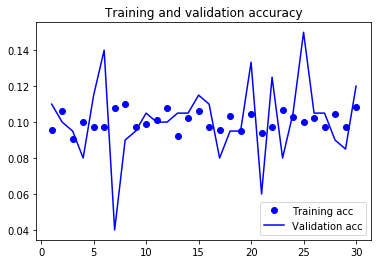

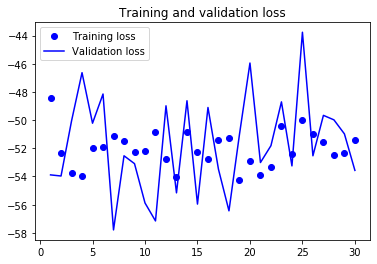

In [15]:
model.save('animals.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()